### Task 1: Exploratory Data Analysis (EDA)

1.	Load the Mushroom dataset and perform fundamental data exploration.
    
2.	Utilize histograms, box plots, or density plots to understand feature distributions.

3.	Investigate feature correlations to discern relationships within the data.


In [1]:
import pandas as pd

# Read the Mushroom dataset
data = pd.read_csv(r"D:\Assignments\SVM\mushroom.csv")
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [3]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [4]:
data.drop('Unnamed: 0',inplace=True,axis=1)

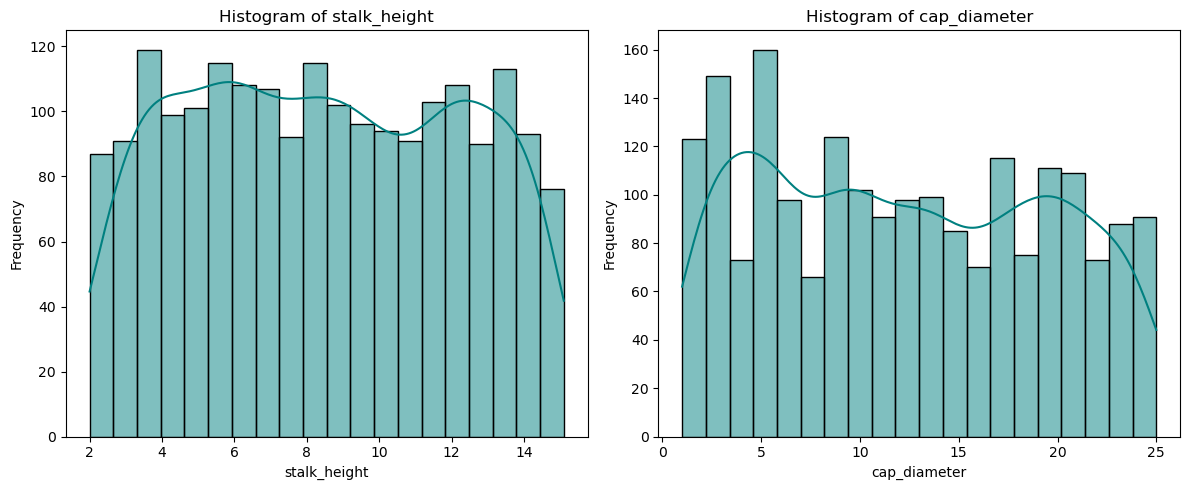

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = ['stalk_height', 'cap_diameter']

# Plot histograms
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 2, i + 1)
    sns.histplot(data[col], kde=True, bins=20, color='teal')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



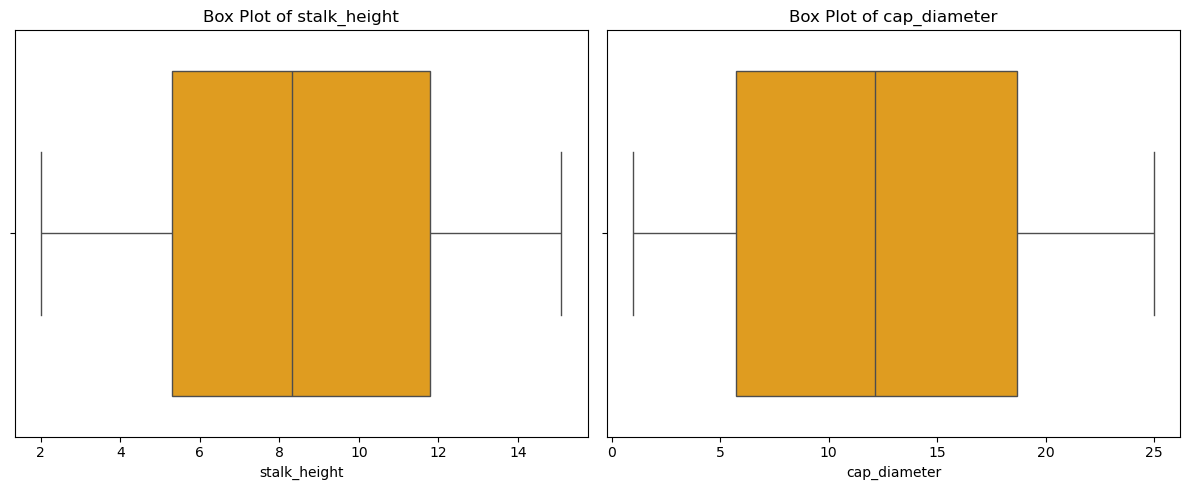

In [6]:
# Plot box plots for numerical features
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()



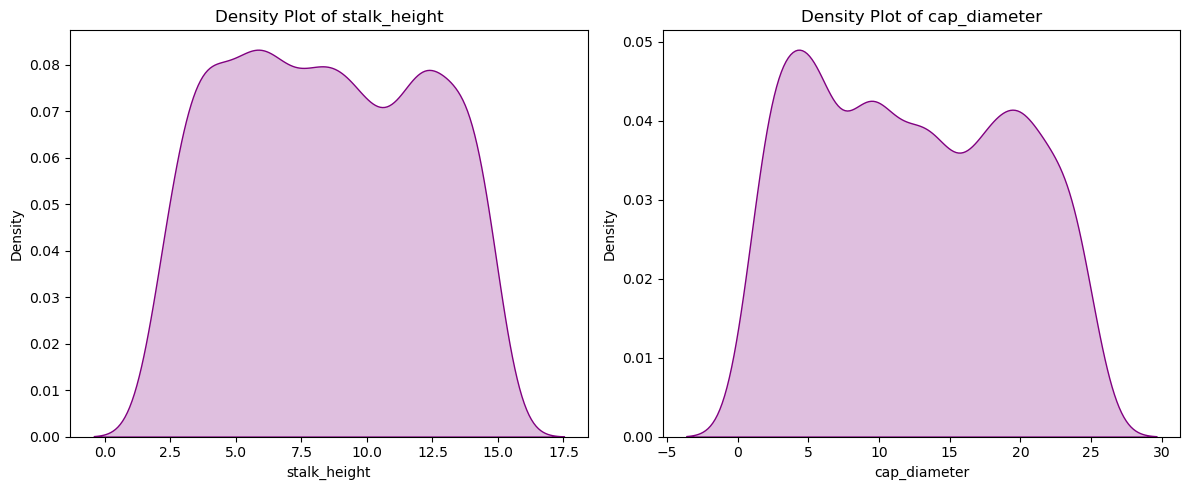

In [7]:
# Plot density plots for numerical features
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(data[col], fill=True, color='purple')
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()



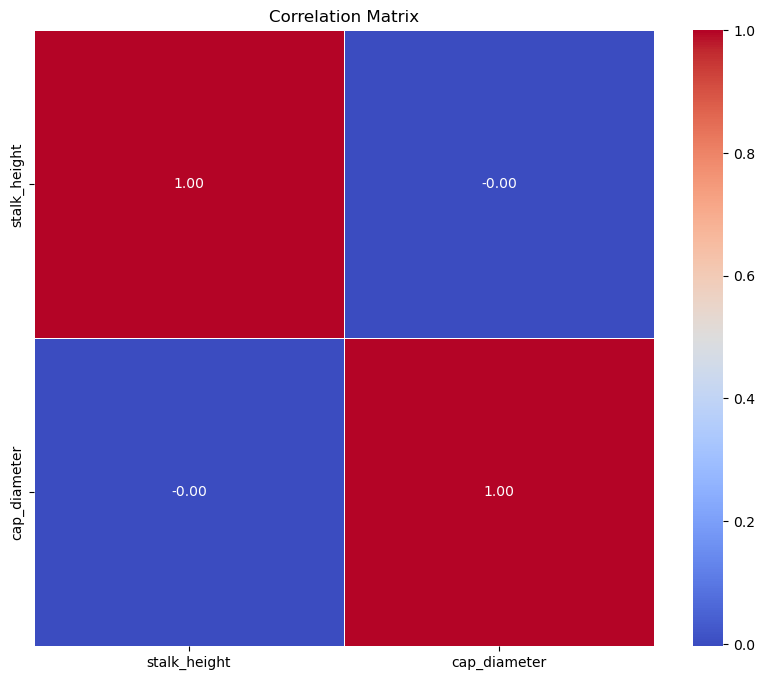

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Visualize with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## Task 2: Data Preprocessing

1.	Encode categorical variables if necessary.

2.	Split the dataset into training and testing sets.


In [10]:
from sklearn import preprocessing
cat_cols = (data.select_dtypes(exclude='float64')).columns
labelencoder = preprocessing.LabelEncoder()
for col in cat_cols:
  data[col] = labelencoder.fit_transform(data[col])
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,11.092703,8.423199


In [11]:
from sklearn.model_selection import train_test_split
X = data.drop('class',axis=1)
y = data['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [13]:
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1.356643,0.398424,1.194966,-1.023271,-1.175776,-0.498601,1.213339,-1.007025,0.487617,1.040833,...,-1.010051,-1.302350,1.246952,1.062902,-0.345783,-0.841884,0.979166,0.654654,1.576459,-1.030123
1,1.356643,-1.396280,0.814161,-1.023271,-1.175776,1.277359,-0.007938,0.993024,-0.693054,-0.960769,...,0.990050,-1.302350,1.246952,1.062902,-1.109522,-0.264460,0.979166,-1.527525,-1.216463,0.958407
2,0.660035,-0.498928,0.433356,0.977259,0.004524,-0.498601,-0.007938,-1.007025,0.782785,1.040833,...,0.990050,1.381985,1.246952,1.062902,0.799826,-1.419308,0.979166,0.654654,0.163717,-0.724904
3,-1.429786,0.398424,0.052551,0.977259,-0.388909,1.277359,-1.229216,-1.007025,0.192449,-0.960769,...,-1.010051,1.381985,1.246952,-1.552935,0.036087,-0.841884,-1.557533,0.654654,-0.871852,1.222967
4,0.660035,1.295777,1.575772,0.977259,0.397958,0.389379,-0.007938,0.993024,0.192449,-0.960769,...,0.990050,0.487207,-1.223483,0.190956,1.563564,-0.841884,0.471826,0.654654,1.511897,0.032765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.356643,0.398424,-1.470669,0.977259,0.004524,-1.386580,-0.007938,0.993024,-0.693054,1.040833,...,-1.010051,-0.407571,0.011735,-0.680990,0.799826,-1.419308,-1.050193,0.654654,-0.695623,0.730771
1996,1.356643,0.398424,0.433356,0.977259,0.397958,-1.386580,1.213339,0.993024,1.077953,1.040833,...,-1.010051,0.487207,0.011735,1.498875,1.563564,-0.264460,0.979166,0.654654,-0.527090,0.168525
1997,-0.036572,-0.498928,-0.328254,0.977259,-0.388909,1.277359,-1.229216,0.993024,0.487617,1.040833,...,-1.010051,-1.302350,1.246952,-1.116962,1.563564,-1.419308,1.486505,0.654654,1.382181,-0.148193
1998,-1.429786,1.295777,1.194966,-1.023271,1.184825,0.389379,-1.229216,0.993024,0.192449,-0.960769,...,0.990050,1.381985,0.011735,-1.552935,-1.109522,1.467811,1.486505,0.654654,0.715199,-0.552164


## Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.


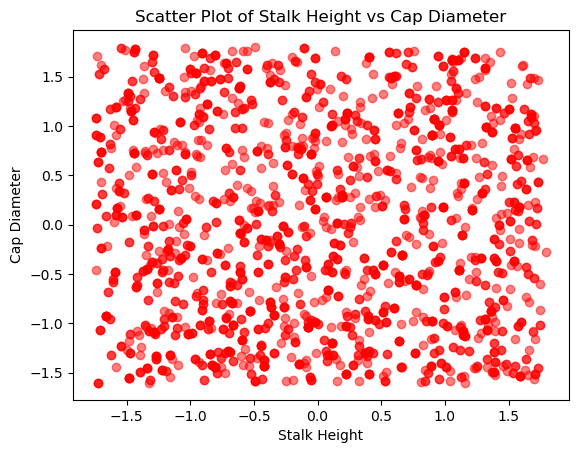

In [14]:
#Scatterplot
import matplotlib.pyplot as plt

plt.scatter(data['stalk_height'], data['cap_diameter'], alpha=0.5, color='red')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.title('Scatter Plot of Stalk Height vs Cap Diameter')
plt.show()


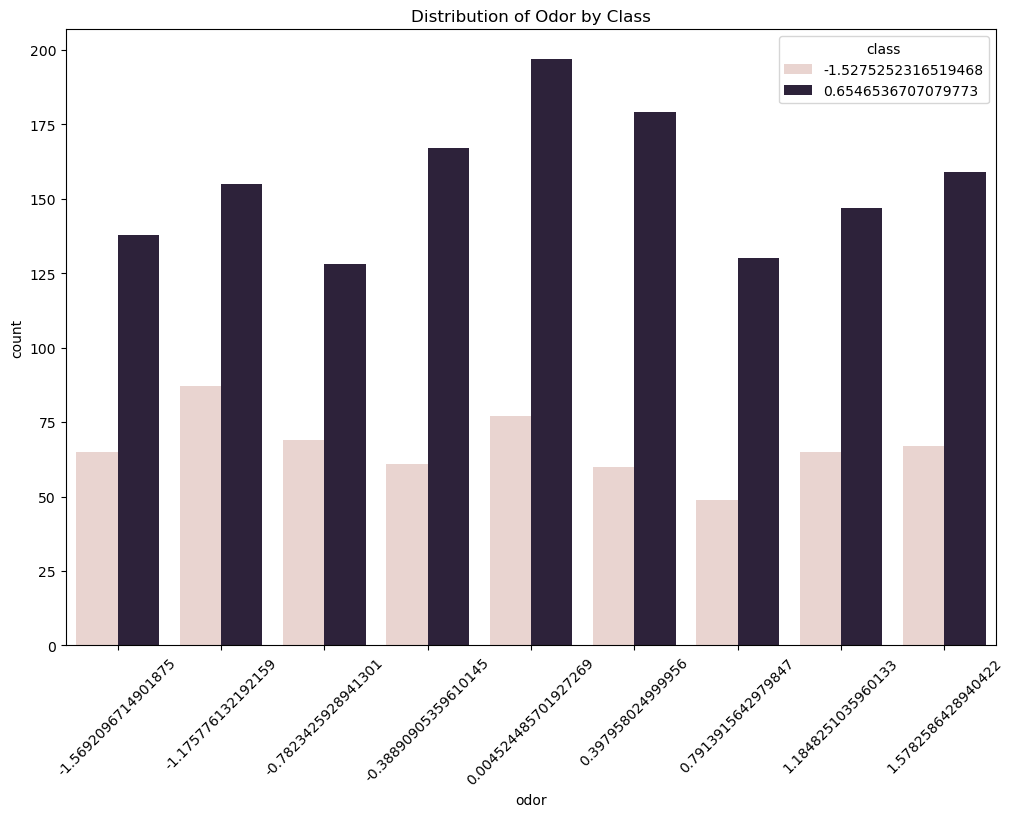

In [19]:
#Bar or count plots can show relationships between categorical features and the target:
plt.figure(figsize=(12,8))
sns.countplot(x='odor', hue='class', data=data)  # Replace 'odor' and 'class' as needed
plt.title('Distribution of Odor by Class')
plt.xticks(rotation=45)
plt.show()


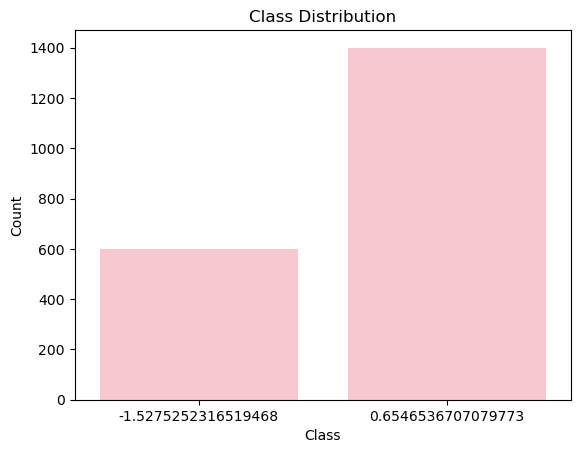

In [17]:
#Class Count Visualization
sns.countplot(x='class', data=data, color='pink')  # Replace 'class' with target column name
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


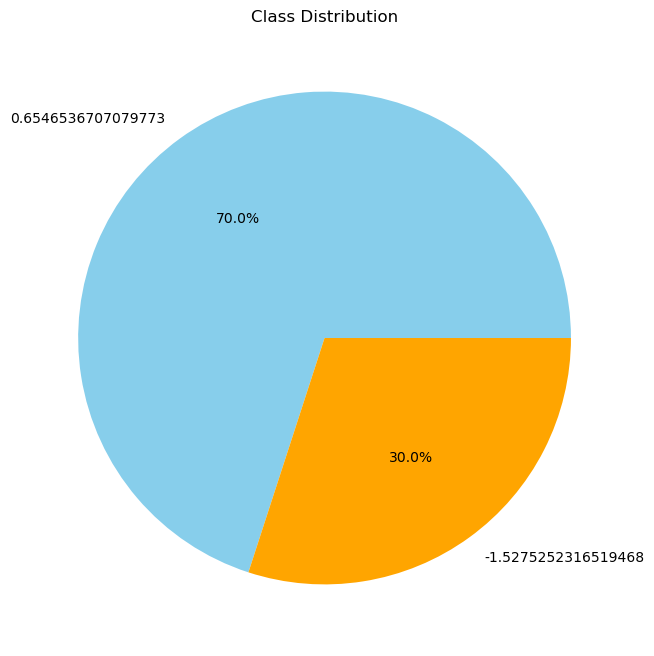

In [20]:
#PieChart
data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

## Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [21]:
from sklearn.svm import SVC   #Support Vector Classifier
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel='rbf',C= 7, gamma = 0.1)
svc.fit(X_train , y_train)


SVC(C=7, gamma=0.1)

In [22]:
y_pred = svc.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('accuracy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall_score: ', recall_score(y_test, y_pred))
print('f1_score: ', f1_score(y_test, y_pred))


accuracy:  0.885
precision:  0.853035143769968
recall_score:  1.0
f1_score:  0.9206896551724137


## Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.


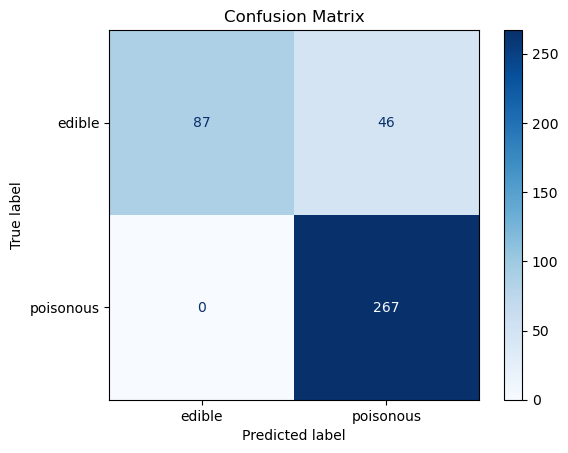

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['edible', 'poisonous'])  # Replace labels if needed
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


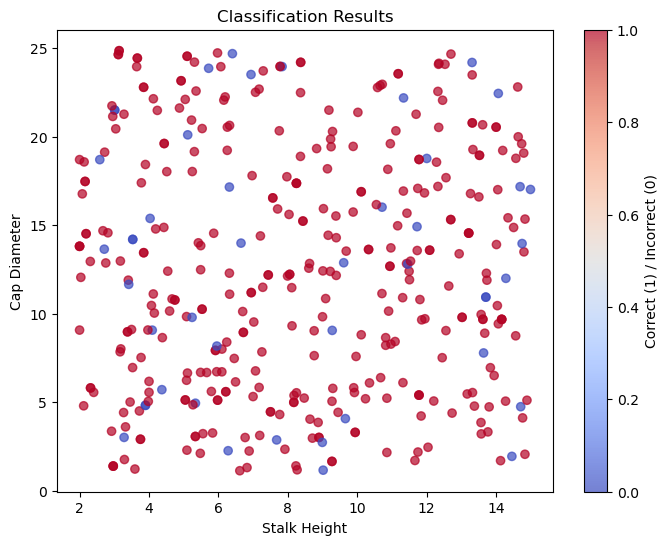

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['stalk_height'], X_test['cap_diameter'], c=(y_test == y_pred), cmap='coolwarm', alpha=0.7)
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.title('Classification Results')
plt.colorbar(label='Correct (1) / Incorrect (0)')
plt.show()


## Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [27]:
param_grid = [{'kernel':['rbf','sigmoid'],
               'gamma':[0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0.1,0.001,0.0001]}]
gsv = GridSearchCV(svc,param_grid)

gsv.fit(X_train,y_train)

GridSearchCV(estimator=SVC(C=7, gamma=0.1),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2,
                                1, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'sigmoid']}])

## Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.



In [28]:
kernels = ['linear', 'poly', 'rbf']
accuracy = []
for i in kernels:
  svc = SVC(kernel=i,C= 15, gamma = 0.5)
  svc.fit(X_train , y_train)
  accuracy.append(accuracy_score(y_test, y_pred))
for j,k in zip(accuracy,kernels):
  print('accuracy for ',k,'is',j)

accuracy for  linear is 0.885
accuracy for  poly is 0.885
accuracy for  rbf is 0.885


In [ ]:
#### 1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

#### Kernel Selection:

Linear: Best for linearly separable data.
Polynomial: Effective for non-linear but polynomial relationships.
RBF (Radial Basis Function): Default kernel; works well for most datasets with complex boundaries.

Performance Metrics:

Use metrics like accuracy, precision, recall, and F1-score for better insights.
The confusion matrix and classification report provide detailed performance breakdowns.
Grid Search:

You can fine-tune parameters like C and gamma using GridSearchCV to fu

#### 2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.


Based on the above visualisations the class distribution shows a nearly even split between edible and poisonous mushrooms.
This balance is ideal for training a Support Vector Machine (SVM), as it reduces the risk of class imbalance affecting model performance.

The heatmap shows a moderate correlation between stalk_height and the target variable (class), while cap_diameter shows a weaker relationship.
Since SVM is sensitive to feature scaling, numerical features will need standardization before training the model.

#### 3.	Discuss practical implications of SVM in real-world classification tasks.


SVM can find patterns in complex data, even when the categories aren’t easy to separate.

SVM can handle datasets with lots of features (like many symptoms to diagnose a disease).

SVM draws a clear boundary (called a hyperplane) between two classes to decide which side a new example belongs to.

It works great when the dataset is small and well-organized, with clear differences between categories.
*---------------------------------------------------*

SVM is sensitive to numbers. If some features are much larger than others (like height in meters vs. weight in grams), it can mess up the results.

SVM can take a long time to process large datasets.

